## <font color=pink>피드백</font>

<font color=pink>
1. EDA에서 분석하신 결과에 대한 휘정님만의 해석이 더 있었다면 좋았을 것 같습니다.<br>
</font>

## Google Play 인기 앱/게임 데이터 크롤링

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# parameters
driver_path = 'chromedriver.exe'
url = 'https://play.google.com/store/apps/top/category/GAME'

# get chromedriver
browser = webdriver.Chrome(executable_path=driver_path)

# open the URL
browser.get(url)
page = browser.page_source

soup = BeautifulSoup(page, 'html.parser')

# 더보기 링크 접속
more = soup.find('div', {'class': 'W9yFB'})
more_link = 'https://play.google.com' + more.a['href']
browser.get(more_link)

# 더보기 링크 속 앱/게임에 접속
more_page = browser.page_source
more_soup = BeautifulSoup(more_page, 'html.parser')
more_games = more_soup.find_all('div', {'class': 'wXUyZd'})

# 앱/게임 데이터 크롤링
game_list = []
for game in more_games:
    game_link = 'https://play.google.com' + game.a['href']

    browser.get(game_link)
    game_info_page = browser.page_source
    game_info_soup = BeautifulSoup(game_info_page, 'html.parser')

    game_title = game_info_soup.find('h1', {'class': 'AHFaub'}).text  # text만 가져오는 기능
    game_info_des = game_info_soup.find('div', {'jsname': 'sngebd'}).text
    game_genre = game_info_soup.find('a', {'itemprop': 'genre'}).text
    
    game_extra = game_info_soup.find('div', {'class': "IxB2fe"})
    
    update_date = game_extra.find_all('div', {'class': "IQ1z0d"})[0].text
    num_game_installed = game_extra.find_all('div', {'class': "IQ1z0d"})[2].text
    android_ver = game_extra.find_all('div', {'class': "IQ1z0d"})[4].text
    game_age_grade = game_extra.find_all('div', {'class': "IQ1z0d"})[5].find_all('div')[0].text

    game_info_list = [game_title, game_info_des, game_genre, update_date, num_game_installed, android_ver, game_age_grade, game_link]
    game_list.append(game_info_list)

browser.quit()
    
game_info_df = pd.DataFrame(game_list, columns = ['title', 'description', 'genre', 'update', 'num_installed', 'android_ver', 'age_grade', 'url'])
game_info_df

,title,description,genre,update,num_installed,android_ver,age_grade,url
0,히어로즈 테일즈,는 7월 1일 10:00에 정식 오픈될 예정입니다!!!▶ 게임 소개 ◀【전투 펫 ...,롤플레잉,2021년 7월 5일,"100,000+",4.4 이상,12세 이상,https://play.google.com/store/apps/details?id=...
1,오딘: 발할라 라이징,사전 다운로드만으로 인기 게임 1위!신규 서버 '헤임달' 오픈신의 영역을 차지하라《...,롤플레잉,2021년 6월 27일,"500,000+",5.0 이상,18세 이상,https://play.google.com/store/apps/details?id=...
2,Brain Rush - Brain Hole Bang,브레인 러쉬는 까다롭고 색다른 수수께끼로 당신의 도전을 테스트할 수 있는 중독성있는...,퍼즐,2021년 7월 5일,"1,000,000+",5.1 이상,15세 이상,https://play.google.com/store/apps/details?id=...
3,Bubble Ouch: Pop it Fidgets & Bubble Wrap Game,Relax and relieve stress by popping bubbles in...,캐주얼 게임,2021년 7월 2일,"1,000,000+",4.4 이상,전체이용가,https://play.google.com/store/apps/details?id=...
4,FNF music battle:Girlfriend’s Ex-Tabi vs Boyfr...,You’ve just had dinner with your sexy Girlfrie...,음악,2021년 6월 27일,"500,000+",4.4 이상,전체이용가,https://play.google.com/store/apps/details?id=...
5,비홍지경,🍬비홍지경 정식 서비스 오픈!🍬💖아기자기하고 가슴두근두근거리는!💖미소녀들과의 만남!...,롤플레잉,2021년 6월 23일,"100,000+",5.0 이상,12세 이상,https://play.google.com/store/apps/details?id=...
6,디 앤츠:언더그라운드 킹덤,실제 존재하는 개미들과 함께 대자연의 왕이 되어보세요!'디 앤츠 : 언더그라운드 킹...,전략,2021년 7월 5일,"50,000+",4.4 이상,전체이용가,https://play.google.com/store/apps/details?id=...
7,X2: 이클립스,◈ 게임 소개 ◈문명이 황폐화 된 미래의 세계.종말을 눈앞에 둔 세상 속에서 ‘해신...,롤플레잉,2021년 6월 28일,"50,000+",5.0 이상,12세 이상,https://play.google.com/store/apps/details?id=...
8,소녀X헌터,거룡을 상대한 건 소녀들이었어!모든 것을 파괴해 버리는포악하고 잔인한 🐉거룡에 대적...,롤플레잉,2021년 6월 9일,"100,000+",7.0 이상,18세 이상,https://play.google.com/store/apps/details?id=...
9,"Fidget Toys 3D - Fidget Cube, AntiStress & Calm",We all fidget in our own ways. Some of us tap ...,시뮬레이션,2021년 6월 18일,"10,000,000+",4.4 이상,전체이용가,https://play.google.com/store/apps/details?id=...


In [3]:
game_info_df.to_csv('game_info_.csv', encoding='utf-8-sig')

## EDA

In [4]:
game_info_df = pd.read_csv('game_info_.csv', index_col = 0)
game_info_df.head(5)

,title,description,genre,update,num_installed,android_ver,age_grade,url
0,히어로즈 테일즈,는 7월 1일 10:00에 정식 오픈될 예정입니다!!!▶ 게임 소개 ◀【전투 펫 ...,롤플레잉,2021년 7월 5일,"100,000+",4.4 이상,12세 이상,https://play.google.com/store/apps/details?id=...
1,오딘: 발할라 라이징,사전 다운로드만으로 인기 게임 1위!신규 서버 '헤임달' 오픈신의 영역을 차지하라《...,롤플레잉,2021년 6월 27일,"500,000+",5.0 이상,18세 이상,https://play.google.com/store/apps/details?id=...
2,Brain Rush - Brain Hole Bang,브레인 러쉬는 까다롭고 색다른 수수께끼로 당신의 도전을 테스트할 수 있는 중독성있는...,퍼즐,2021년 7월 5일,"1,000,000+",5.1 이상,15세 이상,https://play.google.com/store/apps/details?id=...
3,Bubble Ouch: Pop it Fidgets & Bubble Wrap Game,Relax and relieve stress by popping bubbles in...,캐주얼 게임,2021년 7월 2일,"1,000,000+",4.4 이상,전체이용가,https://play.google.com/store/apps/details?id=...
4,FNF music battle:Girlfriend’s Ex-Tabi vs Boyfr...,You’ve just had dinner with your sexy Girlfrie...,음악,2021년 6월 27일,"500,000+",4.4 이상,전체이용가,https://play.google.com/store/apps/details?id=...


In [5]:
game_info_df.info() #결측치 없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          50 non-null     object
 1   description    50 non-null     object
 2   genre          50 non-null     object
 3   update         50 non-null     object
 4   num_installed  50 non-null     object
 5   android_ver    50 non-null     object
 6   age_grade      50 non-null     object
 7   url            50 non-null     object
dtypes: object(8)
memory usage: 3.5+ KB


In [6]:
game_info_df.shape

(50, 8)

In [7]:
# 한글 깨짐 방지
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/MALGUN.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

Text(0.5, 1.0, '인기 앱/게임 장르')

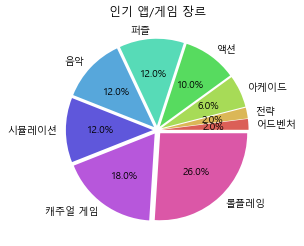

In [8]:
# 인기 앱/게임 genre 구성 비율 확인

labels = game_info_df.genre.value_counts().sort_values().index
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = sns.color_palette('hls',len(labels))
plt.pie(game_info_df.genre.value_counts().sort_values(), labels = labels, autopct = '%.1f%%', explode = explode, colors = colors)
plt.title('인기 앱/게임 장르')

Text(0.5, 1.0, '인기 앱/게임 누적 설치 수')

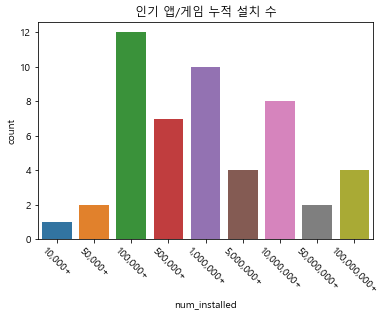

In [9]:
# 인기 앱/게임의 누적 설치 수 분포 확인

sns.countplot(x= game_info_df['num_installed'], order = ['10,000+', '50,000+', '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+', '50,000,000+', '100,000,000+'])
plt.xticks(rotation = - 45 )
plt.title('인기 앱/게임 누적 설치 수')

Text(0.5, 1.0, '안드로이드 버전')

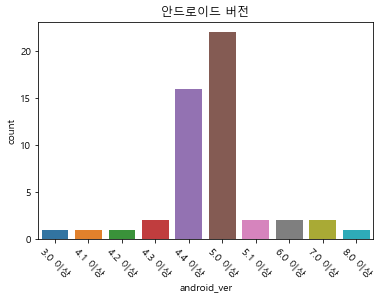

In [10]:
# 인기 앱/게임의 안드로이드 버전 분포 확인

sns.countplot(x= game_info_df['android_ver'], order = game_info_df['android_ver'].value_counts().sort_index().index)
plt.xticks(rotation = - 45 )
plt.title('안드로이드 버전')

Text(0.5, 1.0, '인기 앱/게임 연령 등급')

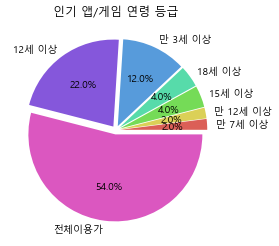

In [11]:
# 콘텐츠 연령 등급의 구성 비율 확인

labels = game_info_df.age_grade.value_counts().sort_values().index
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = sns.color_palette('hls',len(labels))
plt.pie(game_info_df.age_grade.value_counts().sort_values(), labels = labels, autopct = '%.1f%%', explode = explode, colors = colors)
plt.title('인기 앱/게임 연령 등급')